<a href="https://colab.research.google.com/github/minnjeee/SWcamp/blob/main/12_%EB%94%A5%EB%9F%AC%EB%8B%9D/ex01)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_%ED%8F%90%EC%95%94%ED%99%98%EC%9E%90_%EC%83%9D%EC%A1%B4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 폐암 환자의 생존으 예측하는 분류 모델을 만들어보자!
- 신경망을 활용하여 2진분류 문제를 해결해보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 옆의 폴더의 파일의 오른쪽 버튼 -> 경로 복사 가능
# pwd - print working directory : 현재 작업 경로 출력
%pwd

'/content'

In [ ]:
# cd - change directory : 작업 경로 변경
%cd /content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정

/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정'

In [ ]:
data = pd.read_csv('data/ThoraricSurgery.csv', header=None)  # header=None : 열이름 없음

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


- 문제, 정답 분리

In [ ]:
# 문제는 마지막열 빼고 나머지, 정답은 마지막열
X = data.iloc[:,:17]  # 또는 data.iloc[:,:-1]
y = data[17]  # 또는 data[-1] 또는 data.iloc[:,-1]

In [ ]:
X.shape, y.shape

((470, 17), (470,))

- 학습, 평가 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=999)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 17), (118, 17), (352,), (118,))

## 딥러닝 신경망 구성
1. 신경망 구조 설계
2. 학습 및 평가방법 설정
3. 학습 + 시각화
4. 모델 평가

In [ ]:
from tensorflow.keras import Sequential # 신경망의 뼈대를 구축하기 위한 함수
from tensorflow.keras.layers import Dense # 신경망 층(뉴런의 묶음)을 구성해주는 함수

In [ ]:
# 1. 신경망 구조 설계
# 신경망 뼈대 설정
model = Sequential()

# 입력+중간층 설정
model.add(Dense(16, input_dim=17, activation='sigmoid'))
  # input_dim : 입력되는 특성의 수 -> 입력층 1개
  # 중간층 1개(Dense로 설정)
  # activation : 활성화 함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)

# 중간층 추가 (층마다 활성화함수 다르게 가능)
model.add(Dense(8, activation='sigmoid')) # 하나의 층
model.add(Dense(4, activation='sigmoid')) # 하나의 층

# 출력층 설정 (출력층은 문제의 종류에 따라서 고정됨)
# 2진분류 문제는 출력층 뉴련 개수 1개, 활성화함수는 sigmoid로 고정
model.add(Dense(1, activation='sigmoid'))

# 설계된 신경망의 정보를 요약해서 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                288       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


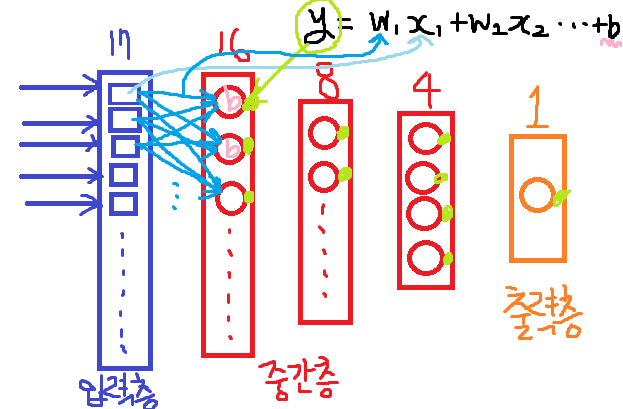

## activation(활성화함수) - 자극에 대한 반응여부와 그 정도를 결정하는 함수
1. 회귀 : linear(선형함수) -> 신경망에서 도출된 수치값을 그대로 예측에 사용
(신경망은 회귀모델을 기반으로 동작하기 때문)
2. 분류 : 인공신경망은 선형회귀 모델을 기반으로 하고 있기 때문에 여기서 도출된 수치값으로는 분류 문제를 풀기 힘듦
  - 이진분류 : sigmoid함수를 통해서 최종적으로 0 or 1로 분류를 해낼 수 있음

In [ ]:
# 2. 신경망 학습 및 평가방법 설정
# 손실함수(비용함수), 최적화함수, 평가방법 설정
model.compile(loss='binary_crossentropy', # loss : 손실함수(비용함수) 설정  # binary_crossentropy : 2진 분류에 사용하는 손실함수
                              # -> 오차의 평균을 구하는 것은 mse와 같지만 0~1 사이값(분류를 편하게 하기 위해)으로 변환 후 평균오차를 구해냄
              optimizer='SGD', # optimizer : 최적화 함수 설정  # SGD : 확률적 경사하강법(mse가 최소가 되는 w,b 찾는 방법 중 하나)
              metrics=['acc'] # metrics : 평가방법 설정  # acc: accuracy(정확도)
              )

In [ ]:
# 3. 학습 및 시각화
h = model.fit(X_train, y_train,
              epochs=100  # 학습 횟수 설정
              )

Epoch 1/100
11/11 [==============================] - 1s 4ms/step - loss: 0.5990 - acc: 0.8636
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5804 - acc: 0.8636
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5637 - acc: 0.8636
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5487 - acc: 0.8636
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5352 - acc: 0.8636
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5230 - acc: 0.8636
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5121 - acc: 0.8636
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5021 - acc: 0.8636
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4931 - acc: 0.8636
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4851 - acc: 0.8636
Epoch 11/100
11/11 [==============================] - 0s 2m

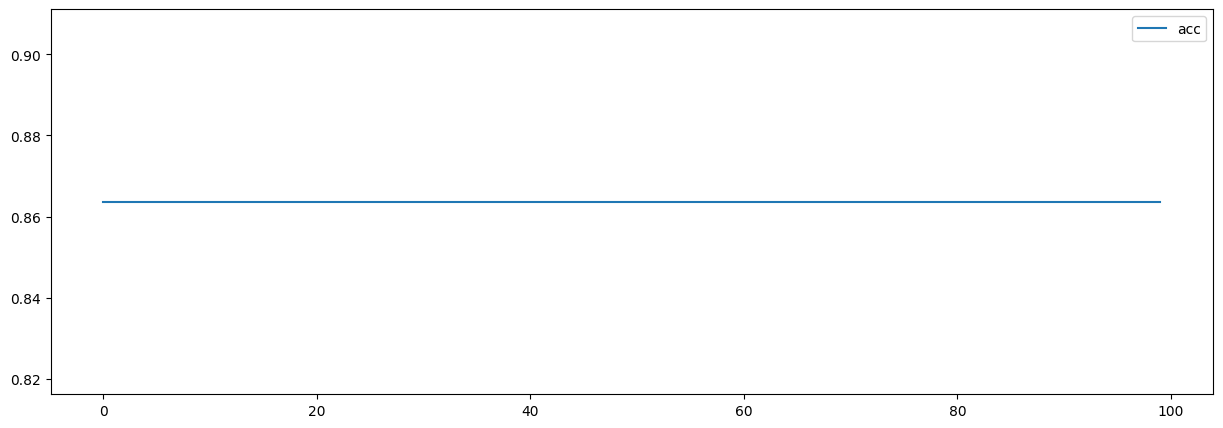

In [ ]:
# 시각화
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')

plt.legend()
plt.show()

In [ ]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 7ms/step - loss: 0.4893 - acc: 0.8136


[0.4893014430999756, 0.8135592937469482]